# A Data Science Project

In this project, my goal is to answer some questions to create a data science education program. I will use a website to detect the most asked questions. This website is [Data Science Stack Exchange](https://datascience.stackexchange.com/). Stack Exchange releases its data base in this [link](https://data.stackexchange.com/datascience/query/new). You can reach every data set from this link. If you need help, there is a [help section](https://data.stackexchange.com/help).

I need to use MySQL query to obtain data that I need from the website. I will get only questions to understand what students are having trouble with. Also, I need the date of creation, the score, the view count, the tags, the count of answers and the count of questions. I will only use 2019 questions because I want to get recent information.

*This is the SQL query:*
<br>
<br>
SELECT Id, CreationDate,
<br>
    Score, ViewCount, Tags,
<br>
    AnswerCount, FavouriteCount
<br>
FROM posts
<br>
WHERE PostTypeId=1 AND YEAR(CreationDate)=2019;
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Opening Data and Cleaning Data

In [2]:
questions= pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
questions.head(1)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


The "FavoriteCount" column has null values, it means that some questions are not favored. So, I will replace these null values with "0". 

In [5]:
questions.fillna(value={"FavoriteCount":0},inplace=True)
questions["FavoriteCount"]=questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

## Finding Most Used Tags

I will modify the "Tags" column first. After that, I will count how many times each tag was used.

In [6]:
questions["Tags"][:3]

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
Name: Tags, dtype: object

In [7]:
questions["Tags"]= questions["Tags"].str.replace("^<|>$", "").str.split("><")

In [8]:
questions["Tags"][:3]

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
Name: Tags, dtype: object

In [9]:
tag_count={}
for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] +=1
        else:
            tag_count[tag]=1

In [10]:
tag_count=pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(15)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


Let's visualize the 20 most used tags.

In [11]:
most_used=tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


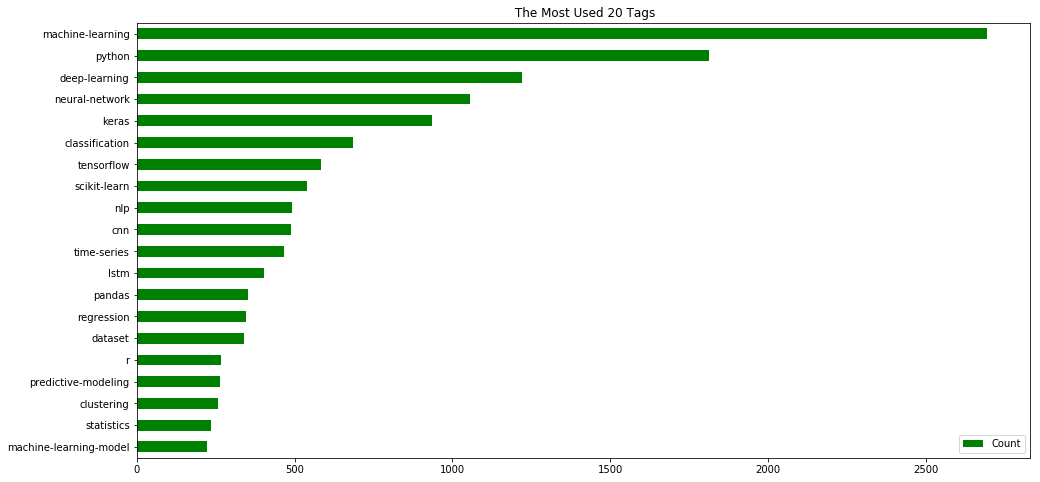

In [12]:
most_used.plot(kind="barh", figsize=(16,8), title= " The Most Used 20 Tags", color="Green")

## Finding Most Viewed Tags

We found the most used tags. Now, I will find the most viewed tags.

In [13]:
tag_view_count= dict()


for idx, tags in enumerate(questions["Tags"]):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag]+= questions["ViewCount"].iloc[idx]
        else:
            tag_view_count[tag]=1

Let's visualize the 20 most viewed tags.

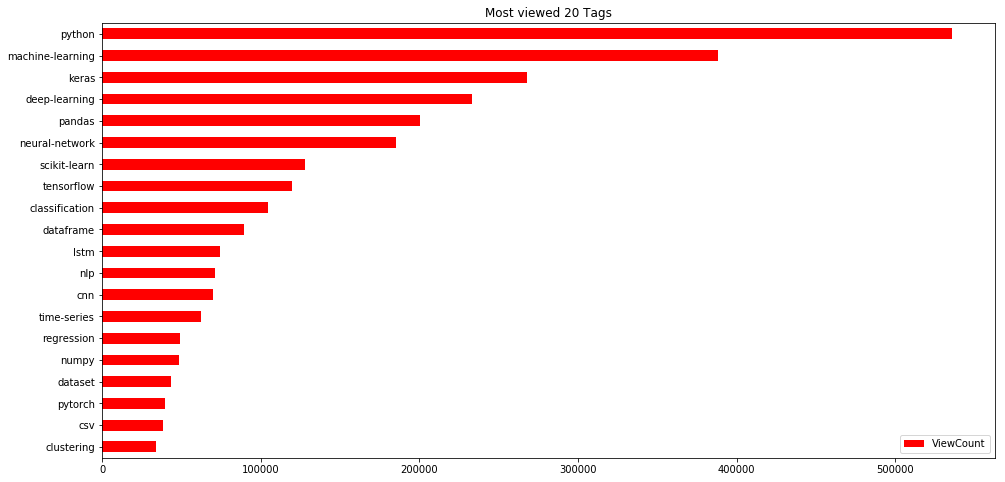

In [14]:
tag_view_count=pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed= tag_view_count.sort_values(by="ViewCount").tail(20)
most_viewed.plot(kind="barh", figsize=(16,8), title="Most viewed 20 Tags", color= "Red")

## Comparing Most Used and Most Viewed Tags

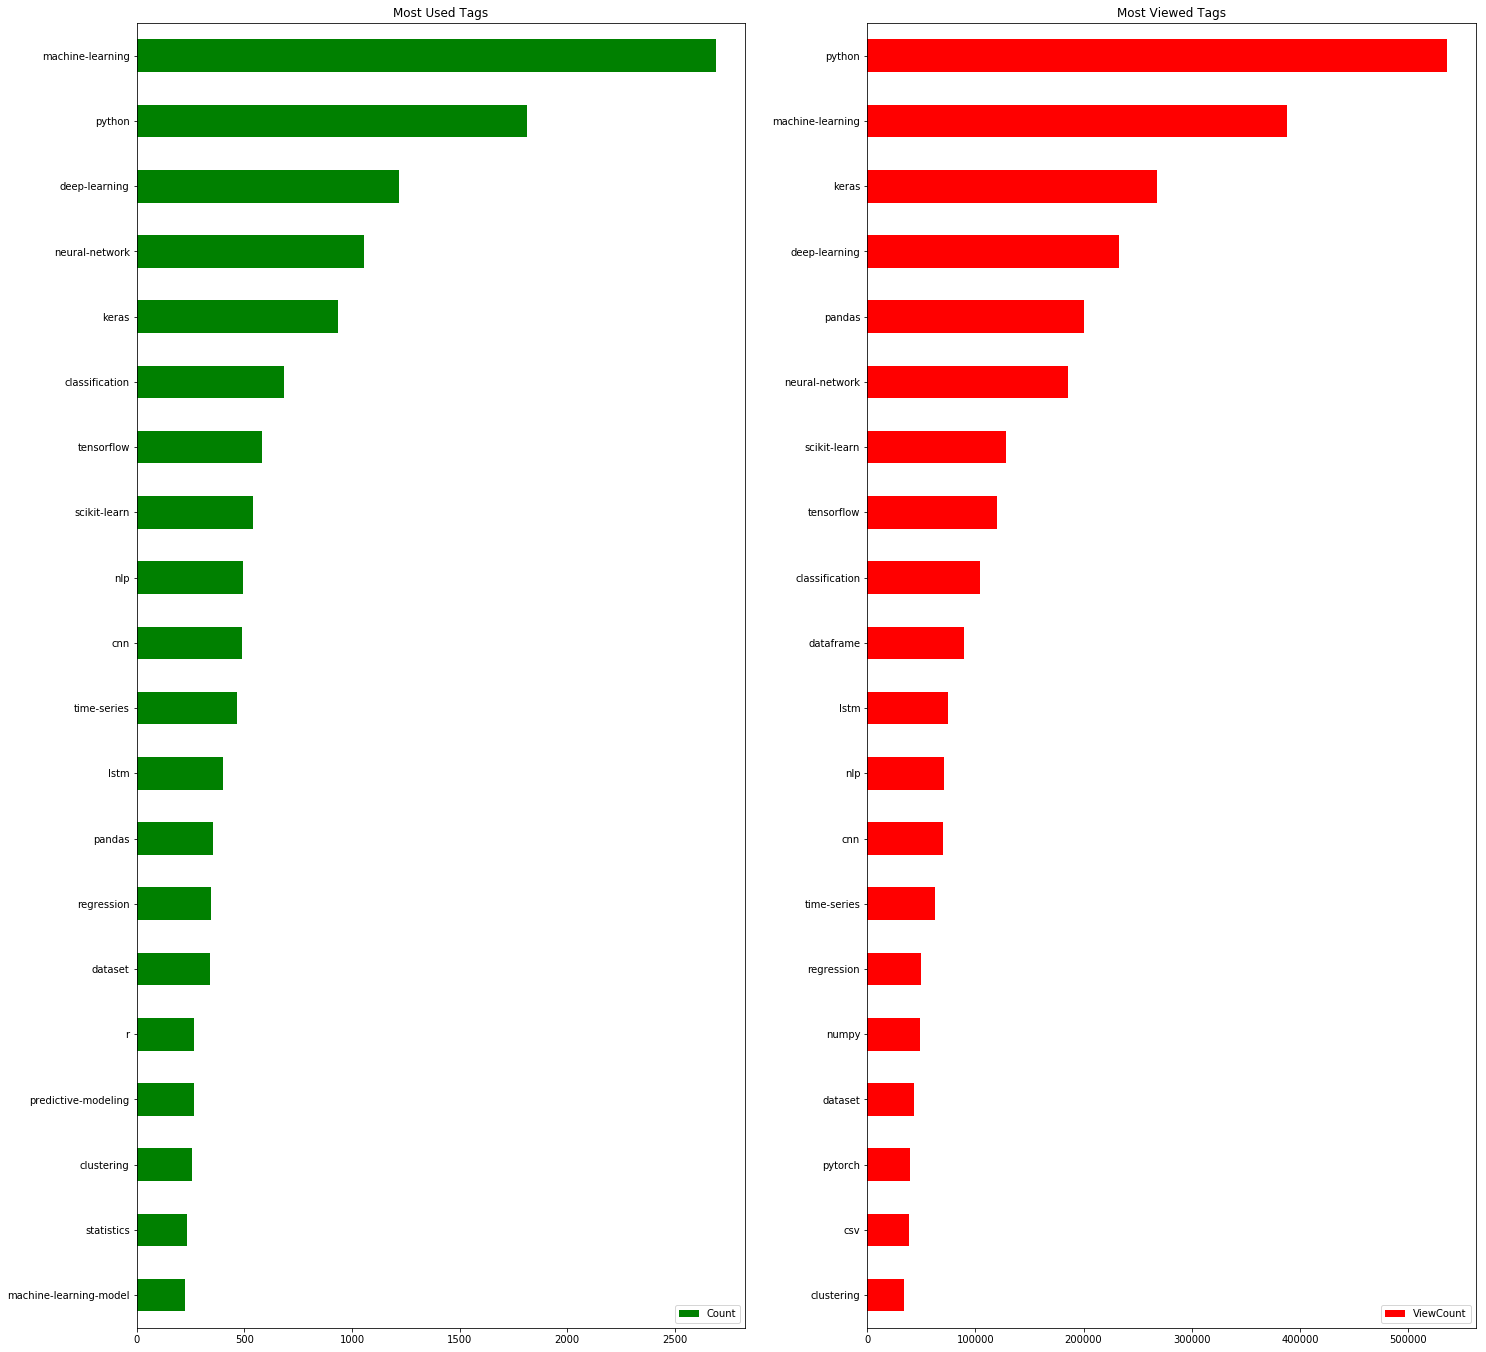

In [15]:
fig,axes= plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24,24))
most_used.plot(kind="barh", ax=axes[0], title="Most Used Tags", color="Green")
most_viewed.plot(kind="barh", ax=axes[1], title="Most Viewed Tags", color="Red")

I visualized two dataframes. You can compare the most viewed tags and the most used tags above. In the next step, I will explore the relationship between tags. 

## Exploring Relationship Between Tags 

I will explore the tags. The tags are used together with each other. I will search how many times the tags are used together.

In [16]:
all_tags= list(tag_count.index)

In [17]:
all_tags[:5]

['machine-learning',
 'data-mining',
 'regression',
 'linear-regression',
 'regularization']

In [18]:
associations= pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


I have created a dataframe. There is no data in it right now. I will fill it in next step.

In [19]:
associations.fillna(0, inplace=True)


for tags in questions["Tags"]:
    associations.loc[tags,tags]+=1

In [20]:
associations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, machine-learning to kitti-dataset
Columns: 526 entries, machine-learning to kitti-dataset
dtypes: int64(526)
memory usage: 2.1+ MB


This dataframe is a little bit large. I will only use the most used tags to help make my job easier. 

In [21]:
relations_between_tags=associations.loc[most_used.index, most_used.index]
relations_between_tags

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


I will add some colors.

In [22]:
def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    helper_df.loc["machine-learning"]= "background-color: purple"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: red"
            
    return helper_df

relations_between_tags.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


I will create a heatmap to show this table more clearly.

In [23]:
for i in range(relations_between_tags.shape[0]):
    relations_between_tags.iloc[i,i]=pd.np.NaN

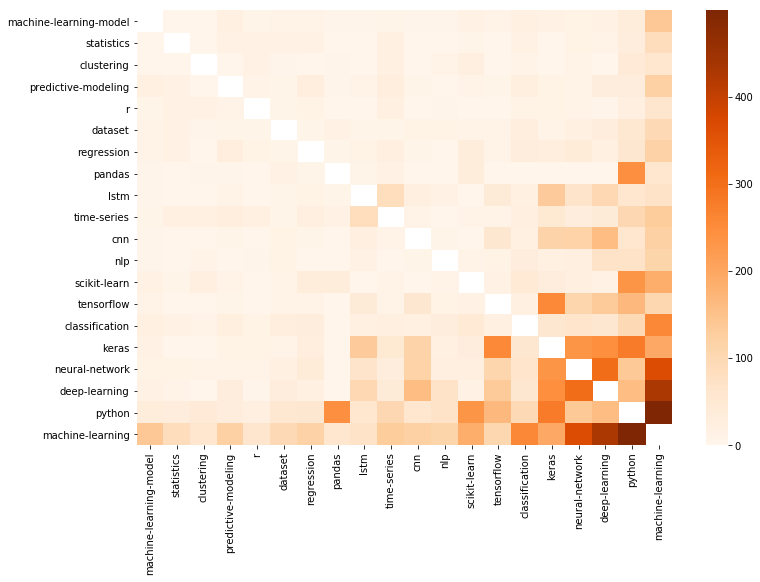

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_between_tags, cmap="Oranges", annot=False)

## Is Deep Learning Just a Fad?

Machine learning and Python are used more. They are like a general heading for data science. After them, I see the "deep learning" concept. I will investigate the "deep learning" concept further. To do that, I will use another data set. The data set is obtained from Stack Exchance website with a query below:
<br>
<br>
SELECT Id, CreationDate, Tags
<br>
FROM posts
<br>
WHERE PostTypeId=1;
<br>
<br>
<br>
I will open the new data set and I will check how many deep learning questions are asked per time period.

In [25]:
all_q= pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])


In [26]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


I will use the same technique to get the "deep learning" tags. Also, there are different tags which are related to deep learning. I will use the list to decide that the post is related to deep learning, below:
<br>
["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]
<br>

In [27]:
all_q["Tags"]=all_q["Tags"].str.replace("^<|>$", "").str.split("><")

In [28]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [29]:
#I will define a function to get true posts
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [30]:
all_q["DeepLearning"]= all_q["Tags"].apply(class_deep_learning)

In [31]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


I will drop data which is posted in 2020.

In [32]:
all_q= all_q[all_q["CreationDate"].dt.year<2020]

In [33]:
# I create a function which  fetches the year and quarter of the post.
def fetch_quarter(datetime):
    year= str(datetime.year)[-2:]
    quarter=str(((datetime.month-1)//3)+1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"]=all_q["CreationDate"].apply(fetch_quarter)

In [34]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


In next step, I will create another dataframe. I will count the number of deep learning questions, total number of questions, and compute the ratio between them.

In [35]:
quarterly= all_q.groupby("Quarter").agg({"DeepLearning": ["sum", "size"]})
quarterly.columns=["DeepLearningQuestions", "TotalQuestions"]
quarterly["DeepLearningRate"]= quarterly["DeepLearningQuestions"]/ quarterly["TotalQuestions"]
quarterly.head()

,DeepLearningQuestions,TotalQuestions,DeepLearningRate
Quarter,,,
14Q2,9,157,0.057325
14Q3,13,189,0.068783
14Q4,21,216,0.097222
15Q1,18,190,0.094737
15Q2,28,284,0.098592


Let's visualize this table.

In [36]:
quarterly.reset_index(inplace=True)

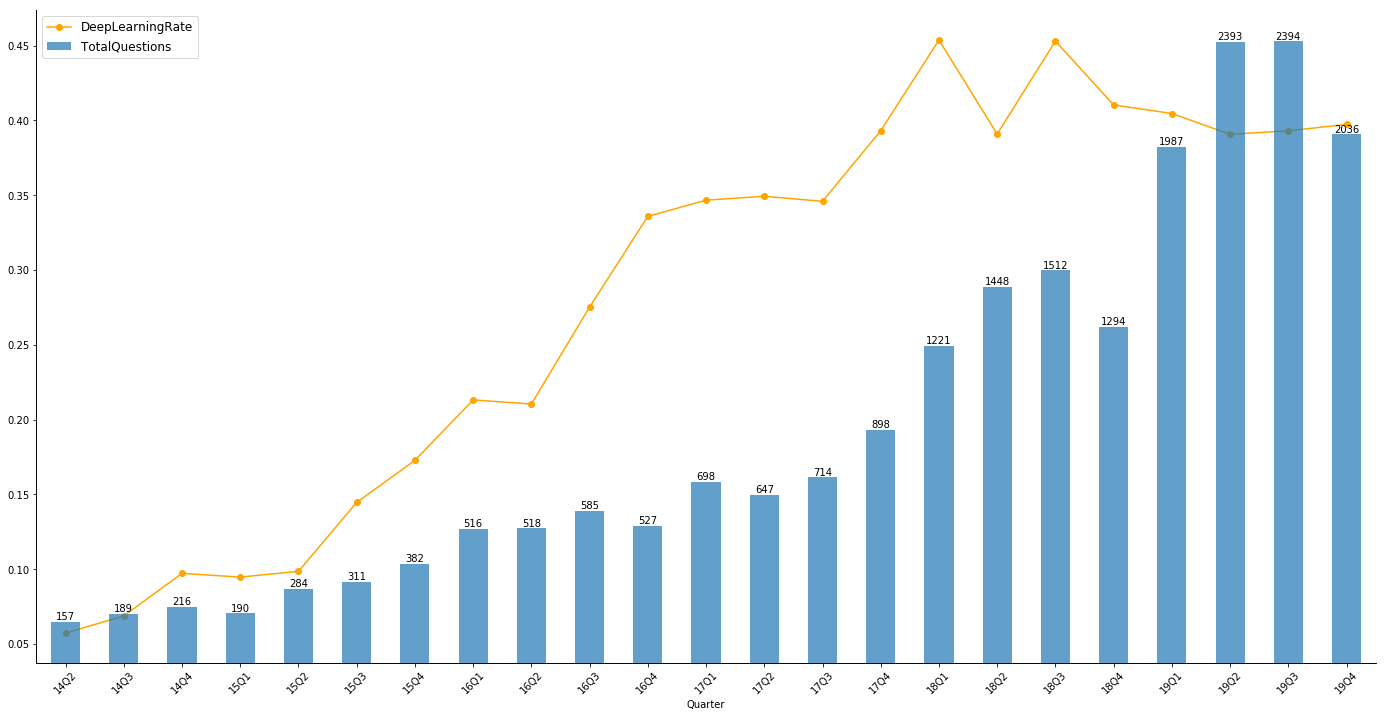

In [37]:
ax1= quarterly.plot(x="Quarter", y="DeepLearningRate", kind="line", linestyle="-", marker="o", color="orange", figsize=(24,12))

ax2= quarterly.plot(x="Quarter", y="TotalQuestions", kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx,t, str(t), ha="center", va="bottom")
    
xlims= ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1= ax1.get_legend_handles_labels()
handles2, labels2= ax2.get_legend_handles_labels()

ax1.legend(handles=handles1+ handles2, labels= labels1+ labels2, loc="upper left", prop={"size":12})

for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

Especially, there is an increase in the interest of deep learning contents after Stack Exchange started. It is still protecting its condition. For the last quarter of the year 2019, the interest is approximately 41%. Regarding this graphic, I can advise that the data science education program can be planned with deep learning contents. 